In [80]:
import pandas as pd
import numpy as np

In [81]:
input_df = pd.read_csv('inputs.csv', sep=";", index_col=0)
input_df

,i1,i2,i3,i4
WAW,10.5,36,129.4,7.0
KRK,3.1,19,31.6,7.9
KAT,3.6,32,57.4,10.5
WRO,1.5,12,18.0,3.0
POZ,1.5,10,24.0,4.0
LCJ,0.6,12,24.0,3.9
GDN,1.0,15,42.9,2.5
SZZ,0.7,10,25.7,1.9
BZG,0.3,6,3.4,1.2
RZE,0.6,6,11.3,2.7


In [82]:
output_df = pd.read_csv('outputs.csv', sep=";", index_col=0)
output_df

,o1,o2
WAW,9.500,129.70
KRK,2.900,31.30
KAT,2.400,21.10
WRO,1.500,18.80
POZ,1.300,16.20
LCJ,0.300,4.20
GDN,2.000,23.60
SZZ,0.300,4.20
BZG,0.300,6.20
RZE,0.300,3.50


Przy użyciu biblioteki PULP napisz skrypt w pythonie, który dla każdej jednostki wyznaczy jej miarę efektywności. Dodatkowo dla każdej z jednostek nieefektywnych znajdź hipotetyczną jednostkę porównawczą oraz poprawki potrzebne do osiągnięcia efektywności. Użyj modelu CCR granicznej analizy danych zorientowanego na *nakłady*. Skrypt powinien wczytywać dane z plików CSV tak, aby po zmianie danego pliku na inny (o takiej samej strukturze) obliczał on efektywność dla nowych danych.

In [83]:
import pulp

def solve(input_df, output_df, dmu_index):

    if len(input_df.index) != len(output_df.index):
        raise ValueError("Number of inputs and outputs must be the same")

    # Variables
    v = pulp.LpVariable.dicts("v", input_df.columns, lowBound=0, cat='Continuous')
    u = pulp.LpVariable.dicts("u",  output_df.columns, lowBound=0, cat='Continuous')

       # problem
    prob = pulp.LpProblem("DMU", pulp.LpMaximize)
    # add sum of outputs * weights to the objective
    prob += pulp.lpSum(
        [output_df.loc[dmu_index, output] * u[output] for output in output_df.columns]
        )
    
    # Constraints

    # sum inputs * weights for dmu_index <= 1

    prob += pulp.lpSum(
        [input_df.loc[dmu_index, input_] * v[input_] for input_ in input_df.columns]
        ) == 1


    # v >= 0
    # u >= 0

    for input_ in input_df.columns:
        prob += v[input_] >= 0

    for output_ in output_df.columns:
        prob += u[output_] >= 0

    # sum of inputs * weights >= sum of outputs * weights
    for dmu in input_df.index:
        prob += pulp.lpSum(
            [input_df.loc[dmu, input_] * v[input_] for input_ in input_df.columns]
            ) >= pulp.lpSum(
            [output_df.loc[dmu, output_] * u[output_] for output_ in output_df.columns]
            )
        
    # solve
    prob.solve()
    return prob, v, u

In [84]:
sample_input_df = [[6], [12], [10], [8]]
sample_output_df = [[132, 9600], [192, 26400], [190, 21000], [144, 14400]]

sample_input_df = pd.DataFrame(sample_input_df, columns=['1'], index=['DMU1', 'DMU2', 'DMU3', 'DMU4'])
sample_output_df = pd.DataFrame(sample_output_df, columns=['1', '2'], index=['DMU1', 'DMU2', 'DMU3', 'DMU4'])

In [85]:
sample_input_df

,1
DMU1,6
DMU2,12
DMU3,10
DMU4,8


In [86]:
sample_output_df

,1,2
DMU1,132,9600
DMU2,192,26400
DMU3,190,21000
DMU4,144,14400


In [87]:
prob, v, u = solve(sample_input_df, sample_output_df, 'DMU4')
prob

DMU:
MAXIMIZE
144*u_1 + 14400*u_2 + 0
SUBJECT TO
_C1: 8 v_1 = 1

_C2: v_1 >= 0

_C3: u_1 >= 0

_C4: u_2 >= 0

_C5: - 132 u_1 - 9600 u_2 + 6 v_1 >= 0

_C6: - 192 u_1 - 26400 u_2 + 12 v_1 >= 0

_C7: - 190 u_1 - 21000 u_2 + 10 v_1 >= 0

_C8: - 144 u_1 - 14400 u_2 + 8 v_1 >= 0

VARIABLES
u_1 Continuous
u_2 Continuous
v_1 Continuous

In [88]:
# var values for v
for var in v:
    print(f"{var}: {v[var].varValue}")

1: 0.125


In [89]:
# var values for v
for var in u:
    print(f"{var}: {u[var].varValue}")

1: 0.0039556962
2: 2.3734177e-05


In [90]:
# objective value
print(pulp.value(prob.objective))

0.9113924015999999


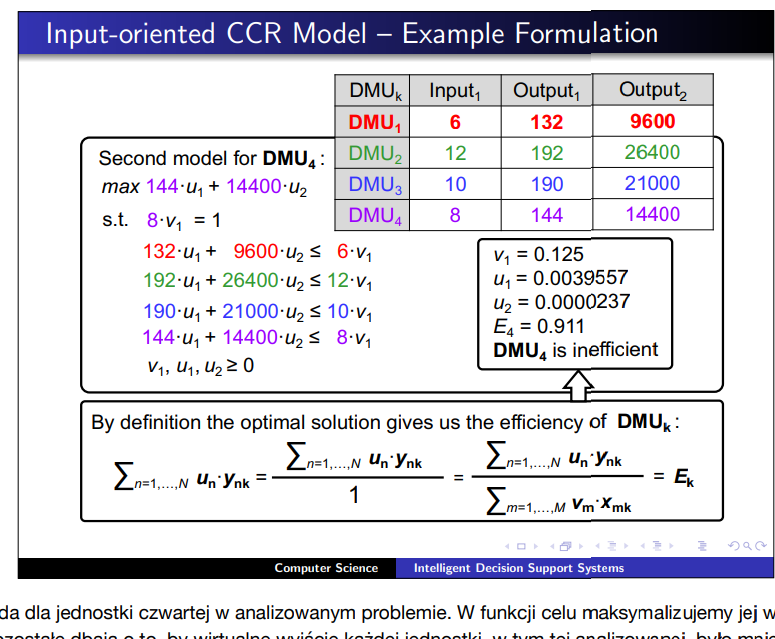

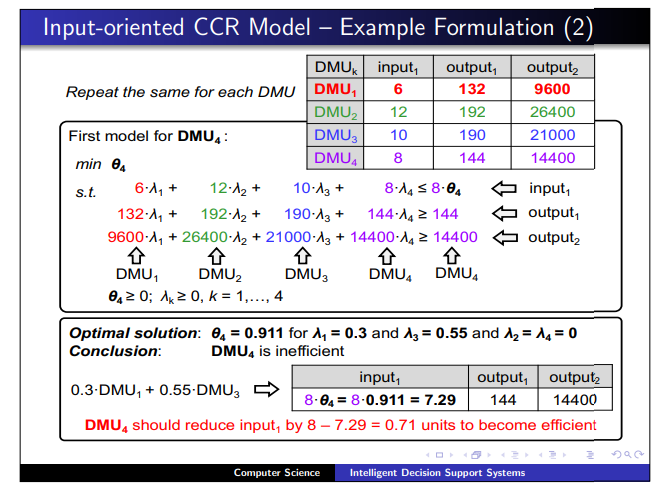

In [91]:
data_df = pd.read_csv('samples_homework.csv', sep=";", index_col=0)
data_df

,i1,i2,i3,i4,o1,o2
sample,,,,,,
1,0.096443,0.059350,0.065224,0.778983,0.620824,0.379176
2,0.032029,0.304959,0.427426,0.235586,0.513536,0.486464
3,0.266256,0.246940,0.217498,0.269306,0.247490,0.752510
4,0.159062,0.635512,0.202159,0.003267,0.223838,0.776162
5,0.096716,0.809025,0.026741,0.067518,0.136140,0.863860
...,...,...,...,...,...,...
96,0.685045,0.072530,0.073261,0.169164,0.339330,0.660670
97,0.298367,0.138924,0.266746,0.295963,0.429870,0.570130
98,0.418018,0.356657,0.113764,0.111562,0.731184,0.268816
